In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import BinaryCrossentropy
from keras.metrics import BinaryAccuracy

In [104]:
data = pd.read_csv("data.csv")

def toarray(row):
    return [row['input1'],row['input2'],row['input3'],row['input4']]

temp = data.apply(toarray,axis=1)
data = pd.DataFrame(list(zip(temp,data['output'])),columns=("input","output"))
x = np.array(data['input'].tolist())
y = np.array(data['output'].tolist())
data.head()

,input,output
0,"[10, 100194214, 132432797, 1]",1
1,"[10, 100600491, 133622588, 1]",1
2,"[10, 100677716, 100764519, 0]",1
3,"[10, 101120346, 101831908, 1]",1
4,"[10, 101177304, 101719109, 1]",0


In [105]:
mms = MinMaxScaler()
test = x.copy()
x = mms.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)
x_train

array([[6.66666667e-01, 1.45741737e-01, 1.52643255e-01, 1.00000000e+00],
       [1.42857143e-01, 2.07043809e-04, 3.28109150e-02, 1.00000000e+00],
       [2.38095238e-01, 4.15066067e-01, 4.57569619e-01, 0.00000000e+00],
       ...,
       [1.00000000e+00, 1.05379713e-01, 1.18214518e-01, 0.00000000e+00],
       [5.23809524e-01, 9.42835662e-02, 9.89927349e-02, 0.00000000e+00],
       [1.42857143e-01, 2.77217184e-04, 2.02142367e-04, 1.00000000e+00]])

In [106]:
# Compile the model
model = Sequential([
    Dense(32, input_dim=4, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss=BinaryCrossentropy(), optimizer="adam", metrics=[BinaryAccuracy()])

In [107]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 0.6485 - binary_accuracy: 0.6604 - val_loss: 0.6462 - val_binary_accuracy: 0.6543
Epoch 2/50
240/240 [==============================] - 0s 1ms/step - loss: 0.6430 - binary_accuracy: 0.6604 - val_loss: 0.6448 - val_binary_accuracy: 0.6543
Epoch 3/50
240/240 [==============================] - 0s 1ms/step - loss: 0.6411 - binary_accuracy: 0.6604 - val_loss: 0.6439 - val_binary_accuracy: 0.6543
Epoch 4/50
240/240 [==============================] - 0s 1ms/step - loss: 0.6401 - binary_accuracy: 0.6604 - val_loss: 0.6438 - val_binary_accuracy: 0.6543
Epoch 5/50
240/240 [==============================] - 0s 2ms/step - loss: 0.6396 - binary_accuracy: 0.6604 - val_loss: 0.6439 - val_binary_accuracy: 0.6543
Epoch 6/50
240/240 [==============================] - 0s 2ms/step - loss: 0.6391 - binary_accuracy: 0.6604 - val_loss: 0.6435 - val_binary_accuracy: 0.6543
Epoch 7/50
240/240 [==============================] - 0s 2ms/ste

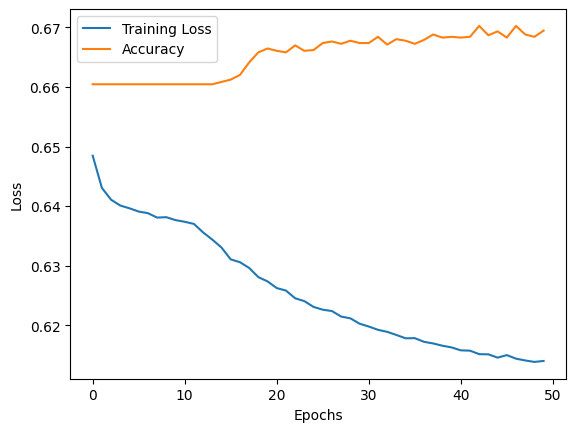

In [108]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['binary_accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [109]:
accuracy_score(list(map(lambda x: round(x[0]),model.predict(x_test))), y_test)


80/80 [==============================] - 0s 798us/step


0.6640563821456539

In [110]:

accuracy_score(list(map(lambda x: round(x[0]),model.predict(x_train))), y_train)


240/240 [==============================] - 0s 833us/step


0.6712793733681462